## Statistical Hypothesis tests: Guttag chapter 21
Cyclist example, does PED-X make a difference in time for a 50-mile race?

Look at a t-distribution, then get data from the PED-X experiment, compare average times for each group
 
 


In [158]:
#Load the usual packages 
import scipy
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [159]:
%matplotlib notebook

<IPython.core.display.Javascript object>


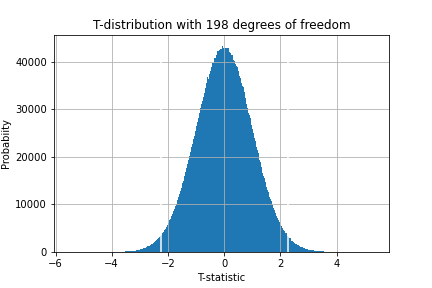

In [161]:
tStat = -2.26
tDist = []  # empty list
numBins = 1000

for i in range(int(1.e7)):
    tDist.append(sp.random.standard_t(198))  # 198 riders

plt.figure(1)
plt.hist(tDist, bins = numBins)
#plt.hist(tDist, bins = numBins, weights = np.array(len(tDist)*[1.0])/len(tDist))  # don't need the weights
plt.axvline(x = -tStat, color = "w")
plt.axvline(x = tStat, color = 'w')
plt.title("T-distribution with 198 degrees of freedom")
plt.xlabel("T-statistic")
plt.ylabel("Probabiity")  
plt.grid()
plt.show()
                                                   
                                                   
                                                   
    

## generate the data sample
From Guttag, page 467

In [170]:
np.random.seed(148)
treatmentDist=(118.44, 5.0)  # mean and standard dev
controlDist  = (119.82, 3.0)
sampleSize = 100
treatmentTimes, controlTimes = [], []

for s in range(sampleSize):
    treatmentTimes.append(np.random.normal(treatmentDist[0], treatmentDist[1]))
    controlTimes.append(np.random.normal(controlDist[0],controlDist[1]))

## Scatter plot of the control and treatment times
results of statistical comparison

<IPython.core.display.Javascript object>


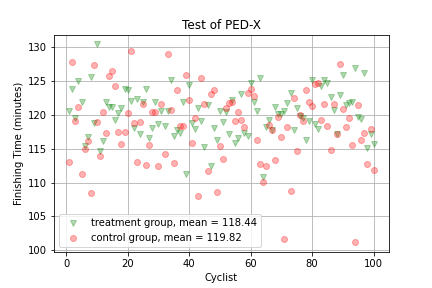

In [171]:

plt.figure(2)
xAxis = np.linspace(1, 100, num=100)

plt.plot(xAxis, controlTimes, 'v', color = 'green', alpha = 0.3,
        label='treatment group, mean = '+ str(treatmentDist[0]))
plt.plot(xAxis, treatmentTimes, 'o', color='red', alpha = 0.3, 
        label='control group, mean = ' + str(controlDist[0]))
plt.title('Test of PED-X')
plt.xlabel('Cyclist')
plt.ylabel('Finishing Time (minutes)')
plt.grid()
plt.legend()
plt.show()

### compute and print the t-statistic and the p-value

Hypothesis test: null and alternative hypotheses  
$H_0$: PED-X has no effect on cyclist time in a 50-mile race  
$H_A$: PED-X has an effect on cyclist time in a 50-mile race

In [172]:
from statsmodels.stats.weightstats import ttest_ind  # different location from text, page 465

print('Treatment mean - control mean =', round((treatmentMean -controlMean),2), ' minutes')

twoSampleTest = ttest_ind(treatmentTimes, controlTimes)
                                
print('The t-statistic from a two-sample test is ', round(twoSampleTest[0],2))
print('The p-value from the two-sample test is ',round(twoSampleTest[1],2))
     

Treatment mean - control mean = 2.35  minutes
The t-statistic from a two-sample test is  -2.78
The p-value from the two-sample test is  0.01
